# Pymaceuticals Inc.
---

### Analysis

### Description of data

We had 249 unique mice in the study but Mouse ID g929 had duplicate data. We cleaned the data by removing that ID from the analysis.

* We tested 10 drug regimens
* There were 248 mice analyzed in the study, after tossing out the duplicated mouse results
* The sample was evenly split between male and female mice.

### Results of the study

Capomulin and Ramicane had the smallest tumors as a result of treatment in the studym at 41.6mm3 and 40.7mm3 respectively. Both showed outliers on the low end of tumor volume. All other drugs had mean tumor volumens above 50mm3.
The data also suggest that there is a linear relationship between average tumor volume and mouse weight for the Capomulin regimen, with a correlation of 0.84.

Ketapril had the highest mean tumor volume, although only by a small amount and the results do not stand out among the remaining regimens.
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview
mouse_study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
# Checking the number of mice.
len(mouse_study_complete["Mouse ID"].unique())

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
dupes = mouse_study_complete[dupes]
#dupes
dupes["Mouse ID"].unique()

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# I used this: clean data frame = dataframe.drop(index of the thing i want to drop)
# So I calculated index as this: index of the thing i want to drop = where the mouse id column is the id i want to drop
mouse_study_complete_clean = mouse_study_complete.drop(mouse_study_complete[mouse_study_complete["Mouse ID"] == "g989"].index)

In [21]:
# checking my new table - does it look like I expect
mouse_study_complete_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_complete_clean["Mouse ID"].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupeddf = mouse_study_complete_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volume_mean = groupeddf["Tumor Volume (mm3)"].mean()
volume_median = groupeddf["Tumor Volume (mm3)"].median()
volume_var = groupeddf["Tumor Volume (mm3)"].var()
volume_std = groupeddf["Tumor Volume (mm3)"].std()
volume_sem = groupeddf["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_study_summary = pd.DataFrame({"Mean Tumor Volume": volume_mean, "Median Tumor Volume": volume_median, "Tumor Volume Variace": volume_var, "Tumor Volume Std. Dev.": volume_std, "Tumor Volume Std. Err.": volume_sem})
mouse_study_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variace,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_summary_agg = groupeddf.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

# Here I stort it by mean volume, smallest to largest
mouse_study_summary_agg = mouse_study_summary_agg.sort_values(by =("Tumor Volume (mm3)", "mean"), ascending = True)
mouse_study_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860

## Bar and Pie Charts

<AxesSubplot:title={'center':'No. of Mice Tested by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints (Mice Tested)'>

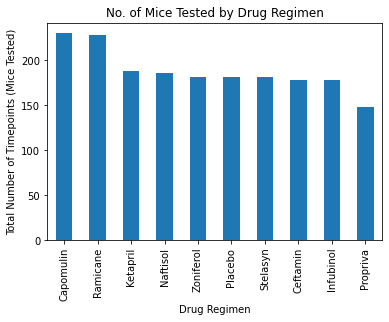

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by drug regimen then sum the timepoints
timepoints_count_df = groupeddf["Timepoint"].count()
# Here I rearrange it into descending order to match the sample chart given in this file
timepoints_count_df = timepoints_count_df.sort_values(ascending=False)

timepoints_count_df.plot(kind='bar', title="No. of Mice Tested by Drug Regimen", xlabel="Drug Regimen", ylabel="Total Number of Timepoints (Mice Tested)", rot=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

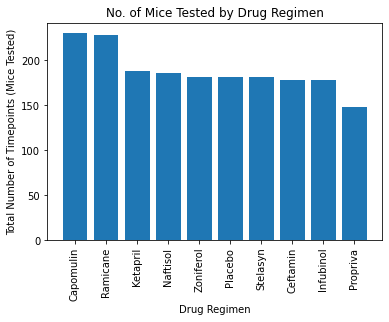

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Here is the chart plot
plt.bar(timepoints_count_df.index, timepoints_count_df)
# And here I am giving it labels
plt.title("No. of Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints (Mice Tested)")
plt.xticks(rotation=90)

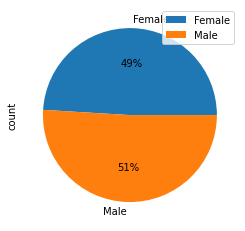

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First I group the data by gener, then I get the index values (M/F) and the data values in order to put the pie chart together
gender_group = mouse_study_complete_clean.groupby("Sex").count()
gender_pie_index = gender_group["Mouse ID"].index
gender_pie_values = gender_group["Mouse ID"].values
gender_group_df = gender_group["Mouse ID"]

# Now the chart in Pandas
gender_pie = pd.DataFrame({'count': gender_pie_values}, index=gender_group.index)
gender_pie.plot.pie(y='count', autopct='%1.f%%')

plt.show()

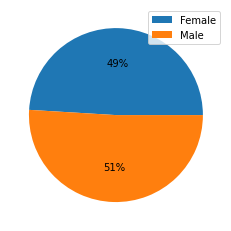

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# This is the plot using the same data we got above but plotting it with pyplot instead of pandas
plt.pie(gender_pie_values, autopct= '%1.f%%')
plt.legend(gender_pie_index)
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# This gets the index of those timepoints
idx = mouse_study_complete_clean.groupby("Mouse ID")["Timepoint"].idxmax()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# I use those indexes to pull the rows at those indexes with the columns that I want from the clean data frame, and drop it into a new dataframe
# It's not exactly merging with the original DF but it pulls from the original DF in a really clean way
last_timepoint_df = mouse_study_complete_clean.loc[idx]
last_timepoint_df = last_timepoint_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
last_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3)
907,a203,45,67.973419
289,a251,45,65.525743
1134,a262,45,70.717621
1487,a275,45,62.999356
736,a366,30,63.440686
...,...,...,...
1566,z435,10,48.710661
646,z578,45,30.638696
279,z581,45,62.754451
683,z795,45,65.741070


In [30]:
# Put top 4 treatments into a list for for loop (and later for plot labels)
# I look for the top 4 in the aggregated table, and because they are the index in the table I just grab from there, and put those in a list. I already sorted them earlier.
drugs_list = mouse_study_summary_agg.index[:4]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# I also make these lists to keep the volume for later plotting, and the outliers list. I will feed lists into these lists.
tumor_volume_all_drugs = []
tumor_outliers_all_drugs = []   

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_list = mouse_study_complete_clean[mouse_study_complete_clean["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    avg_tumor_vol = tumor_vol_list.mean()
    q1 = tumor_vol_list.quantile(0.25)
    q3 = tumor_vol_list.quantile(.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    # Determine outliers using upper and lower bounds
    outliers_list = tumor_vol_list[(tumor_vol_list>upper) | (tumor_vol_list < lower)]
    total_outlier_data = [drug, avg_tumor_vol, q1, q3, upper, lower, outliers_list]
    # add subset
    tumor_volume_data.append(total_outlier_data)
    tumor_outliers_all_drugs.append(outliers_list)
    tumor_volume_all_drugs.append(tumor_vol_list)

# Now I can print all the outliers by tumor to make sure that we caught these (and it looks like the sample starter code)
for tumor in tumor_volume_data:
    print(tumor[0], "'s potential outliers: ", tumor[6])

    

NameError: name 'drug_list' is not defined

Text(0.5, 1.0, 'Final Tumor Volume by Drug Regimen')

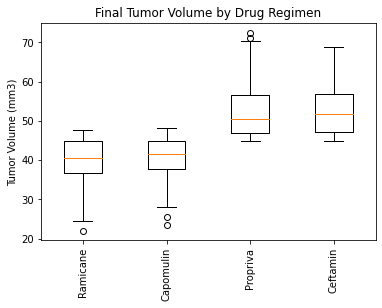

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# This is useing pyplot
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_all_drugs, showfliers = True)
ax.set_xticklabels(drug_list)
plt.xticks(rotation=90)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Final Tumor Volume by Drug Regimen")

## Line and Scatter Plots

[array(['b128'], dtype=object), array(['b742'], dtype=object), array(['f966'], dtype=object), array(['g288'], dtype=object), array(['g316'], dtype=object), array(['i557'], dtype=object), array(['i738'], dtype=object), array(['j119'], dtype=object), array(['j246'], dtype=object), array(['l509'], dtype=object), array(['l897'], dtype=object), array(['m601'], dtype=object), array(['m957'], dtype=object), array(['r157'], dtype=object), array(['r554'], dtype=object), array(['r944'], dtype=object), array(['s185'], dtype=object), array(['s710'], dtype=object), array(['t565'], dtype=object), array(['u364'], dtype=object), array(['v923'], dtype=object), array(['w150'], dtype=object), array(['w914'], dtype=object), array(['x401'], dtype=object), array(['y793'], dtype=object)]


Text(0.5, 1.0, 'Capomulin Treatment of Mouse B128')

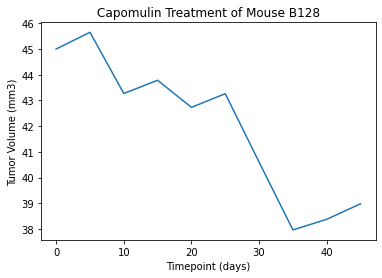

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# First I find the unique IDs of mice in the study for this dtru
capomulin_df = mouse_study_complete_clean[mouse_study_complete_clean["Drug Regimen"] == "Capomulin"]
capomulin_ids = capomulin_df.groupby("Mouse ID")["Mouse ID"].unique().tolist()
print(capomulin_ids)
# I can see that b128 is one such mouse (I'm just taking the first value returned)

# Now I pick that mouse and create a chart for it
mouse_id = 'b128'
mouse_b128_df = mouse_study_complete_clean[mouse_study_complete_clean["Mouse ID"] == mouse_id]
mouse_b128_time = mouse_b128_df["Timepoint"]
mouse_b128_tumor_volume = mouse_b128_df["Tumor Volume (mm3)"]

#print(mouse_b128_time)
#print(mouse_b128_tumor_volume)

plt.plot(mouse_b128_time, mouse_b128_tumor_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse B128")

Text(0.5, 1.0, 'Capomulin: Tumor Volume vs. Weight')

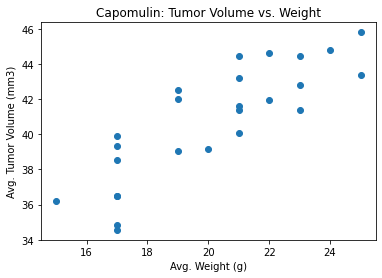

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# This uses pyplot. I get the avg volumes and avg weights, the feed them to the scatterplot method. And add labels to things.
capomulin_avg_volumes = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(capomulin_avg_weight, capomulin_avg_volumes)
plt.xlabel("Avg. Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs. Weight")

## Correlation and Regression

the correlation is  0.84
covar:  7.82
slope:  0.95
intercept:  21.55


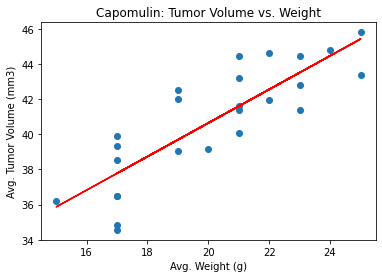

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# I create a dataframe from those weight and volume data I had above
capo_avg_wt_vol_df = pd.DataFrame({"Weight":capomulin_avg_weight, "Vol":capomulin_avg_volumes})
# Calc correlation between the two
corr_value = capo_avg_wt_vol_df["Weight"].corr(capo_avg_wt_vol_df["Vol"])
print("the correlation is ", round(corr_value,2))
# Get the means for weight and volume data
weight_mean_all = capo_avg_wt_vol_df["Weight"].mean()
volume_mean_all = capo_avg_wt_vol_df["Vol"].mean()
# Calculate the covariance
covar = ((capo_avg_wt_vol_df["Weight"] - weight_mean_all) * (capo_avg_wt_vol_df["Vol"] - volume_mean_all)).sum()/(capo_avg_wt_vol_df.shape[0] - 1)
print("covar: ",round(covar,2))
# Calculate the slope of the fit curve
slope = covar / capo_avg_wt_vol_df["Weight"].var()

print("slope: ",round(slope,2))

# Calculate the intercept
intercept = volume_mean_all - slope * weight_mean_all
print("intercept: ",round(intercept,2))


# Re-plot the thing with the same code as before but adding the regression line

plt.scatter(capomulin_avg_weight, capomulin_avg_volumes)
plt.xlabel("Avg. Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs. Weight")
# Here is the regression line
plt.plot(capo_avg_wt_vol_df["Weight"], slope * capo_avg_wt_vol_df["Weight"] + intercept, color = 'red')
plt.show()